In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt

# 데이터 로드

In [6]:
#data_dir = 'C:\\Users\\HP\\Desktop\\2020-02-092.한국인감정인식_sample\\원천데이터'
#data_dir = 'D:\\RAPA\\미니프로젝트\\2차\\2020-02-092.한국인감정인식_sample\\원천데이터'
#data_dir = 'C:\\Users\\HP\\Desktop\\jupyter\\미니프로젝트2\\emotion_cv2\\final_data'
data_dir = r'D:\감정\한국인 감정인식을 위한 복합 영상\Validation\final_data'

batch_size = 24
img_height = 224
img_width = 224

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25167 files belonging to 7 classes.
Using 20134 files for training.


C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54889 (\N{HANGUL SYLLABLE HWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.pri

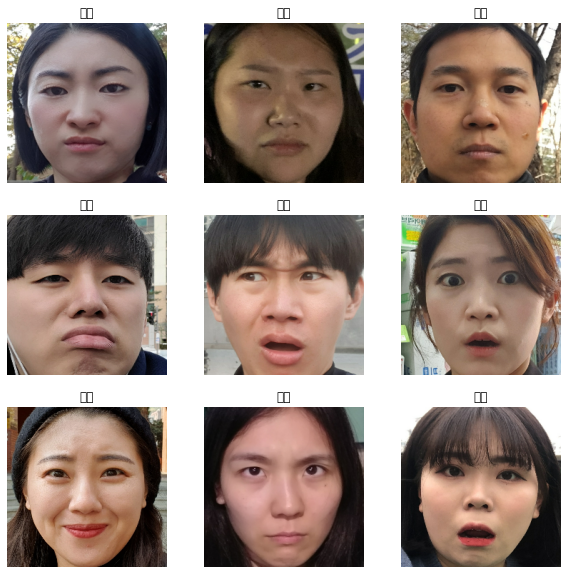

In [8]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25167 files belonging to 7 classes.
Using 5033 files for validation.


In [10]:
img_shape = (img_height , img_width, 3)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습 자동 중단 설정.
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=20, mode='min', min_delta=0.01)

#모델 저장 폴더/이름.
modelpath="emotionmodel.hdf5"


In [12]:
# 최적화 모델 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', save_freq='epoch', options=None)

In [13]:
MobileNetV3_MODEL = tf.keras.applications.MobileNetV3Large(input_shape = img_shape, # 224,224,3이 아닐 경우 입력
                                                           alpha = 1.0, # 네트워크 너비 제어. 1.0보다 클 때, 레이어 필터 수 늘림.1인경우 기본
                                                           include_top = False, # 네트워크 상단에 완전 연결 계층 포함 여부.(질문?)
                                                           # dropout_rate=0.2,    # 마지막 레이어에 드롭할 입력단위비율
                                                           weights = 'imagenet')
MobileNetV3_MODEL.trainable=False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

# FFNN의 가중치는 학습됨
prediction_layer = tf.keras.layers.Dense(len(class_names), activation='softmax')

from tensorflow.keras.layers.experimental import preprocessing
#모델 설정
modelMobileNetV3 = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    MobileNetV3_MODEL,
    global_average_layer,
    tf.keras.layers.Dropout(rate=0.5),
    prediction_layer
])

# 학습 자동 중단 설정.
early_stopping_callback_Mobile = EarlyStopping(monitor='val_loss', patience=20)

#모델 저장 폴더/이름.
modelMobilepath = r"C:\Users\HP\Desktop\Metaverse\7월\MiniProject2_faceImg\\model\\emotionmodelMobile.hdf5"

# 최적화 모델 저장
checkpointerMobile = ModelCheckpoint(filepath=modelMobilepath, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch', options=None)

# 모델 컴파일
modelMobileNetV3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# VGG16_MODEL = tf.keras.applications.VGG16(input_shape = img_shape,
#                                          include_top = False,
#                                          weights = 'imagenet')
# VGG16_MODEL.trainable=False  

In [15]:
# VGG16_MODEL.summary()

In [16]:
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()   

# # FFNN의 가중치는 학습됨
# prediction_layer = tf.keras.layers.Dense(len(class_names), activation ='softmax')

In [17]:
# model = tf.keras.Sequential([
#     modelMobileNetV3,
#     global_average_layer,
#     prediction_layer
# ])   

In [ ]:
#모델을 실행합니다
epochs = 40
historyMobileNetV3 = modelMobileNetV3.fit(train_ds, epochs=epochs, validation_data=(val_ds),
                    verbose=1, callbacks=[early_stopping_callback_Mobile, checkpointerMobile])

Epoch 1/40


In [109]:
# # 모델 컴파일
# model.compile(optimizer = 'adam',
#              loss = 'sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [110]:
# #모델을 실행합니다
# epochs=40
# history = model.fit(train_ds, epochs=epochs, validation_data=(val_ds),
#                    verbose=1, callbacks=[early_stopping_callback,checkpointer])

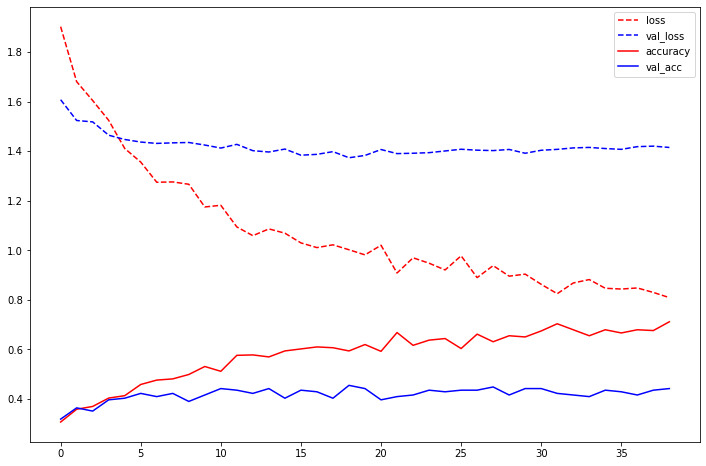

7/7 [==============================] - 0s 42ms/step - loss: 1.4150 - accuracy: 0.4416


[1.415033221244812, 0.44155845046043396]

In [112]:
plt.figure(figsize=(12,8))
plt.plot(historyMobileNetV3.history['loss'],'--',c='red')
plt.plot(historyMobileNetV3.history['val_loss'],'--',c='blue')
plt.plot(historyMobileNetV3.history['accuracy'],c='red')
plt.plot(historyMobileNetV3.history['val_accuracy'],c='blue')


plt.legend(['loss','val_loss','accuracy','val_acc'])
plt.show()

modelMobileNetV3.evaluate(val_ds)


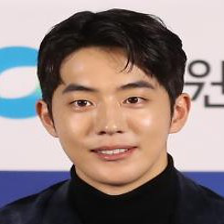

In [45]:
img = PIL.Image.open("박주희 최애.jpg").convert('RGB')
img = img.resize((224, 224))
img

In [46]:
np_img = np.array(img)
np_img.shape

(224, 224, 3)

In [47]:
np_img = np_img.reshape(1,224,224,3)

# 모델 argumax확인

In [48]:
proba = modelMobileNetV3.predict(np_img)

idx = np.argmax(proba)
class_names[idx]

1/1 [==============================] - 0s 26ms/step


'중립'

# 모델 평가 지표